In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [398]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [2]:
df = pd.read_csv("hotel_bookings.csv") 
df_eda = pd.read_csv("hotel_bookings.csv") # Load seperate copy for EDA purposes only 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# EDA

To understand the data, the follo

* Proportion of cancellations and non-cancellations
* The number of bookings vs. lead times
* Distribution of lead times among customer segments
* Average daily rate per month
* Average number of bookings by month and day of the week 
* Distribution of price among room types

### Data Characteristics

In [4]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

The following data characteristics should be corrected:
* All date/time columns should be considered as categorical (month is already assigned to the correct type). 
* Adults, children and babies columns are oridinal, so children should be converted from float to int. 
* Agent and company are ID columns and should be considered categorical.   

In [5]:
# For features with NaN values, count number of NaN's
na = pd.DataFrame(df_eda.isna().sum(), columns=['NaN'])
na[(na['NaN']>0)]

,NaN
children,4
country,488
agent,16340
company,112593


The above tables summerizes the number of NaN values in the dataset, the features they are found in and how many in each feature. In addition, over 94% of the 'company' feature is missing and therefore provides very little information.

In [6]:
# Drop target, date and categorical attributes
df_describe = df_eda.drop(['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 
                       'arrival_date_day_of_month', 'agent', 'company'], axis=1).describe()
df_describe.transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0


The above information shows that most features have a mean of around zero and a small standard deviation around the mean. This could hint that these features may be mostly zeros. The max is also significantly higher than the mean, which could indicate that values are still spread out despite the most of it being zero. To investigate further, the variance can be calculated for each numerical feature to determine the spread of the data. And to understand the data more, the frequency of the most common value (i.e. zero) in each feature can also be calculated.

In [7]:
# Create dataframe for numeric features 
cols = df_describe.columns
df_num = df_eda[cols]

# Find most frequent value, percentage make up of most frequent value, and variance for each feature
most_freq = []
percent = []
var = []
for i in df_num.columns:
    percent.append((df_eda[i].value_counts().max()/df_eda.shape[0]*100).round(2))
    most_freq.append(df_eda[i].value_counts().idxmax())
    var.append(np.var(df_eda[i]))

# Apply results to table    
variances_table = pd.DataFrame(index=df_num.columns)
variances_table['Most Frequent Value'] = most_freq
variances_table['Percentage in Feature'] = percent
variances_table['Variance'] = var
variances_table

,Most Frequent Value,Percentage in Feature,Variance
lead_time,0.0,5.31,11419.625860
stays_in_weekend_nights,0.0,43.55,0.997221
stays_in_week_nights,2.0,28.21,3.641523
adults,2.0,75.12,0.335540
children,0.0,92.80,0.158850
babies,0.0,99.23,0.009494
is_repeated_guest,0.0,96.81,0.030894
previous_cancellations,0.0,94.57,0.712898
previous_bookings_not_canceled,0.0,96.97,2.242298
booking_changes,0.0,84.86,0.425499


Zero is the most common value in all features except "stays_in_week_nights" and "adults". For most features, the most common feature occurs more than 90% of the time - the highest being "babies", with zero making up 99.23% of the data. Some of the less severe features include "adults" and "total_of_special_request", with their most common values making up 75.12% and 58.90% of the data respectively. 

Although zero makes up 96.90% of the "days_in_waiting_list" feature, it has a variance of 309.57 which indicate that the data is infact spread out. However almost all features here show low variance, so its possible that some features bring little information (or predictive power) due to it being almost constant.

In [8]:
from scipy.stats import zscore

# Compute absolute z-scores
zscore = np.abs(zscore(df_num))
df_zscores = pd.DataFrame(data=zscore, columns=df_num.columns)

# Sum z-scores greater than 3 and group by feature
outliers = pd.DataFrame(df_zscores[df_zscores > 3].count(), columns = ['Number of Outliers'])

# Calculate percentage make up in each feature 
outliers['Percentage in Feature'] = outliers['Number of Outliers'].apply(lambda x : x/df.shape[0]*100).round(2)
outliers

,Number of Outliers,Percentage in Feature
lead_time,1454,1.22
stays_in_weekend_nights,2199,1.84
stays_in_week_nights,1669,1.40
adults,481,0.40
children,0,0.00
babies,917,0.77
is_repeated_guest,3810,3.19
previous_cancellations,317,0.27
previous_bookings_not_canceled,936,0.78
booking_changes,1570,1.32


The above table indicates the total number of outliers for each feature using z-score method, all observations are standarized with a standard deviation of 1. Then the z-score for each observation is computed. Any score greater than 3 or less than -3 is considered to be an outlier as 99.7% of the data should be within three standard deviations from the mean. 

The percentage of data that the outliers make up in each feature is also included in the second column to gauge how much variation is left in a given feature if its outliers were removed. For example, for 'required_car_parking_spaces', the outliers make up 6.21% of the data. The most common value, zero, makes up 93.79%. If outliers are removed, then the entire feature would be constant at zero and therefore provide no information.

Now consider the categorical data:

In [9]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

In [10]:
meal = pd.DataFrame(df_eda['meal'].value_counts())
market = pd.DataFrame(df_eda['market_segment'].value_counts())
distribution = pd.DataFrame(df_eda['distribution_channel'].value_counts())
deposit = pd.DataFrame(df_eda['deposit_type'].value_counts())
customer = pd.DataFrame(df_eda['customer_type'].value_counts())
reservation = pd.DataFrame(df_eda['reservation_status'].value_counts()) 

side_by_side(meal, deposit, customer, reservation)

            meal                deposit_type                     customer_type               reservation_status
BB         92310    No Deposit        104641    Transient                89613    Check-Out               75166
HB         14463    Non Refund         14587    Transient-Party          25124    Canceled                43017
SC         10650    Refundable           162    Contract                  4076    No-Show                  1207
Undefined   1169                                Group                      577                                 
FB           798                                                                                               


In [11]:
side_by_side(market, distribution)

               market_segment               distribution_channel
Online TA               56477    TA/TO                     97870
Offline TA/TO           24219    Direct                    14645
Groups                  19811    Corporate                  6677
Direct                  12606    GDS                         193
Corporate                5295    Undefined                     5
Complementary             743                                   
Aviation                  237                                   
Undefined                   2                                   


In [12]:
print('Number of unique countries:', df_eda['country'].nunique())
print('Number of unique agents:', df_eda['agent'].nunique())

Number of unique countries: 177
Number of unique agents: 333


From the information on the categorical features indicate that some features, i.e. 'meal', 'customer_type', etc, contain only a small number of unique values and is more manageable. However, 'country' and 'agent' have 177 and 333 unqiue values respectively, making them more difficult to encode. It may be more productive to group them into bins.

### Target Feature

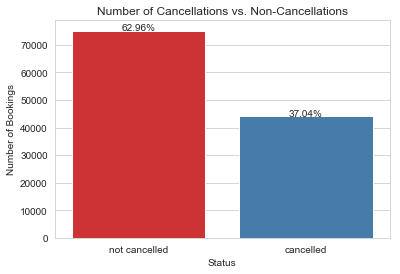

In [358]:
is_canceled = ['not cancelled', 'cancelled']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
ax = sns.countplot(x='is_canceled', data=df_eda, palette='Set1')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+40, '{0:.2%}'.format(height/total), ha="center")
ax.set_xticklabels(is_canceled)
plt.title('Number of Cancellations vs. Non-Cancellations')
ylabel = plt.ylabel("Number of Bookings")
xlabel = plt.xlabel("Status");

The feature being predicted on is whether a booking will cancelled. It is a binary feature with 37.04% of bookings were cancelled vs. 62.96% that were not. This represents a slight class imbalance in the target feature.

### Data Visualization

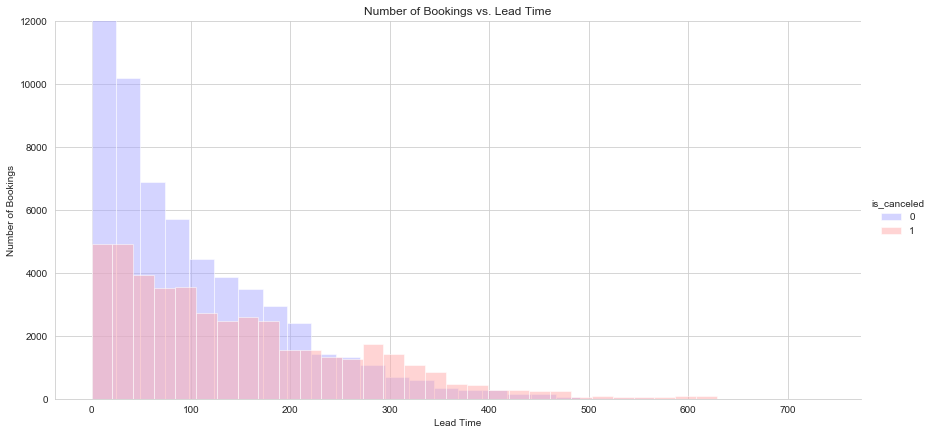

In [14]:
# Plot stacked bar plot. 
g = sns.FacetGrid(df_eda, hue="is_canceled", height=6, aspect=2, palette='bwr')
g = g.map(plt.hist, 'lead_time', bins=30, alpha=0.5).add_legend()
plt.title("Number of Bookings vs. Lead Time")
ylabel = plt.ylabel("Number of Bookings")
xlabel = plt.xlabel("Lead Time")
# To better visualize the bar plot, upper limit of y is reduced to 12,000. 
plt.ylim(0,12000);

When bookings are made a few days in advance, only a fraction of them are cancelled. Note that the actual number in the '0-20' bin extends to 28,000 bookings, however the y limit here is set to 12,000 for clarity of the proceeding bins.

As the lead time increases, the number of cancellations relative to non-cancellations also increase. When bookings are made more than 220 days out, the number of cancellations begin to equal the number of non-cancellations. Starting at around 280 days out, there are more cancellations than there are retained bookings. The next step is to analyze how lead time is distributed among the market segment.

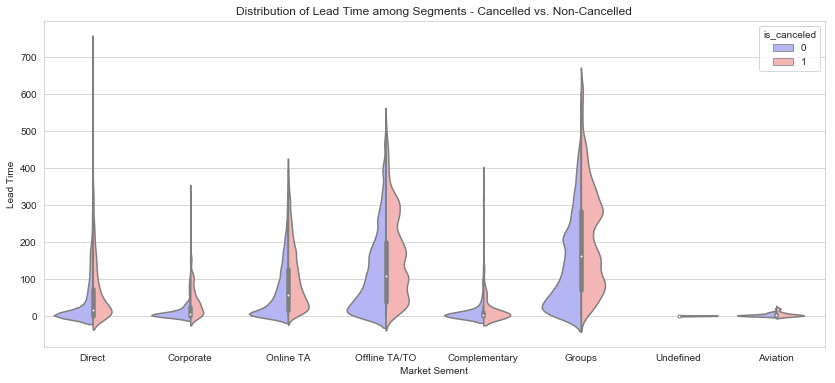

In [15]:
plt.figure(figsize=(14,6))
sns.violinplot(x='market_segment', y='lead_time', data=df_eda, hue='is_canceled', split=True, palette='bwr')
plt.title("Distribution of Lead Time among Segments - Cancelled vs. Non-Cancelled")
ylabel = plt.ylabel("Lead Time")
xlabel = plt.xlabel("Market Sement");

This violinplot summerizes the distribution of lead time among the observed market segments, which is further seperated by cancelled (red) vs. non-cancelled bookings (blue). Bookings that were made from direct, corporate, complementary and aviation channels typically have short lead times (under 100 days), with aviation providing the shortest notice. The distribution of cancelled vs. non-cancelled appear to be similar for those particular channels, except corporate bookings which can be expected to cancel when the lead time around 50 days or more. 

Online TA, offline TA/TO, and groups contribute heavily towards lead times in excess of 100 days. As expected, cancellations begin to outnumber retained bookings in those groups as the lead time increases. With that said, it does not appear that any particular segment contributes to more cancellatations. They all contribute evenly in proportion to the bookings they generage.

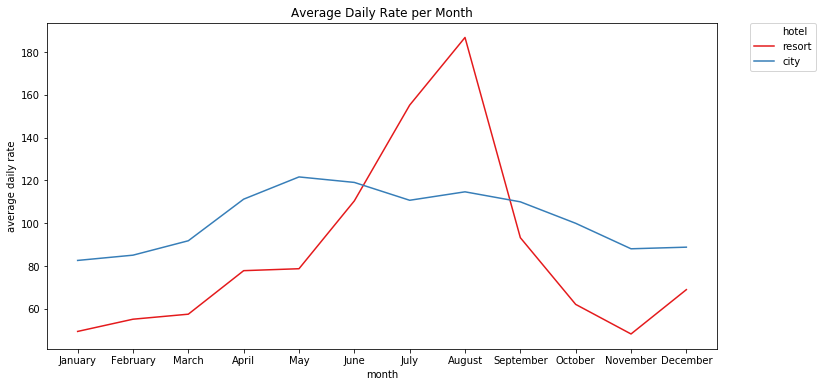

In [23]:
# Drop outlier with adr = 5400
df_line = df_eda.drop(df_eda[df_eda['adr']== df_eda['adr'].max()].index)

# Create dataframes for resort and city hotels based on average price for every month
price_resort = df_line[(df_line['hotel']=='Resort Hotel')].groupby('arrival_date_month').mean()['adr']
price_city = df_line[(df_line['hotel']=='City Hotel')].groupby('arrival_date_month').mean()['adr']
price_resort_df = pd.DataFrame({"month": list(price_resort.index), "hotel": "resort", "average daily rate": list(price_resort)})
price_city_df = pd.DataFrame({"month": list(price_city.index), "hotel": "city", "average daily rate": list(price_city)})

# Concatnate dataframes and convert 'month' to ordered categorical data
price_per_month = pd.concat([price_resort_df,price_city_df])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
price_per_month['month'] = pd.Categorical(price_per_month['month'], ordered=True, categories=months)

# Plot lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='average daily rate', hue='hotel', data=price_per_month, sort=True, palette='Set1')
plt.title('Average Daily Rate per Month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

The daily rate for both the resort and city hotel are clearly higher in the summer months compared to the cooler months. Rates for resort hotels peak in July and August. For city, the rates are reduced slightly during these months, possibly to compete with resort hotels. However the rates for resort are generally cheaper throughout the year, and are only more expensive then city during June to August. During this part of the analysis, it was discovered that there was an outlier with an apr = 5400, which was removed for this visualization. 

The next part of the analysis requires the days of the week (Monday, Tuesday, etc.) not availble in the raw data. Fortuantely with calendar.weekday this information can be generated if year, month, and day is given. However some intial preprocessing will is required.

In [24]:
import calendar 
# map new column with month interger of each record 
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 
              'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_eda['month'] = df_eda['arrival_date_month'].map(month_dict)

# define function to return weekday from date and apply to new column
def week_func(x): 
    dayNumber = calendar.weekday(x['arrival_date_year'], x['month'], x['arrival_date_day_of_month']) 
    days =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
    return (days[dayNumber]) 

df_eda['weekday'] = df_eda.apply(week_func, axis=1)

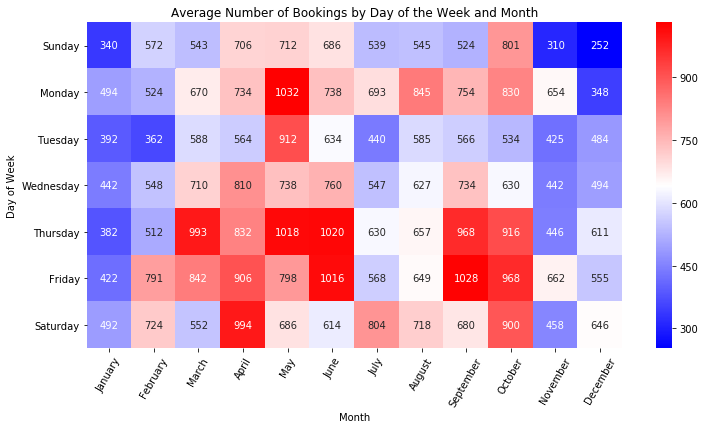

In [25]:
# Now that the days of the week are available for each record, inference can be done using this new information
# Groupby using weekday and month with count as aggregate
df_eda = df_eda.assign(booking_id=np.arange(len(df))).reset_index(drop=True)
byweekmonth = df_eda.groupby(by=['weekday','arrival_date_month']).count()['booking_id'].unstack(level=1)
byweekmonth = byweekmonth.loc[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

# Divide counts in Jul and Aug by 3 and all other months by 2 to calculate the average count per month
jul_aug = byweekmonth[['July','August']].apply(lambda x : x/3, axis=1).round()
byweekmonth = byweekmonth.drop(['July','August'],axis=1)
byweekmonth = byweekmonth.apply(lambda x : x/2, axis=1).round()
byweekmonth = pd.concat([jul_aug, byweekmonth], axis=1)
byweekmonth = byweekmonth.astype(int)
byweekmonth = byweekmonth[months]

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(byweekmonth, annot=True, cmap='bwr', fmt="d")
plt.title("Average Number of Bookings by Day of the Week and Month")
plt.xticks(rotation=60)
ylabel = plt.ylabel("Day of Week")
xlabel = plt.xlabel("Month")

The dataset contains data from July 2015 to August 2017. So while most months appear twice, the months of July and August appear three times and therefore provide an extra month of data each. To account for this, the count for Jul and Aug is divided by 3. All other months are divided by 2.

It can be inferred from the heatmap that the there are more bookings during the summer months. Bookings start reduce during the fall months and pick back up again during spring. In addition, most check-ins tend to start in the later part of the week, i.e Thrusday and Friday. Monday also appears to be a popular day of the week to check-in. There seems to be a cooldown in bookings during the months of July and August which may intuitively seem incorrect. This drop can be rationalized when price is considered. From a previous analysis, it was determined that these months are when prices peak, which could lead to people avoiding travel during that time.

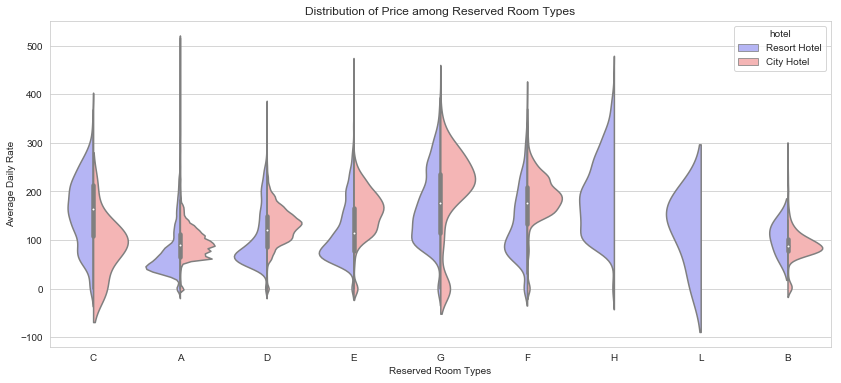

In [19]:
# Drop rows with reserved_room_type = P which only listed apr = 0 
df_violin = df_line.drop(df_line[(df_line['reserved_room_type']=='P')].index)

# Plot violin plot
plt.figure(figsize=(14,6))
sns.violinplot(x='reserved_room_type', y='adr', data=df_violin, hue='hotel', split=True, palette='bwr')
plt.title("Distribution of Price among Reserved Room Types")
ylabel = plt.ylabel("Average Daily Rate")
xlabel = plt.xlabel("Reserved Room Types");

As per the uploader of the dataset, the room type is coded for anonymity reasons. During this analysis, it was discovered that each booking under the reserved room type 'P' was listed with an adr of 0. For this portion, room type 'p' is removed from the dataset as it provides no information.

The violin plot shows the distribution of price across different room types. The first thing to note is that room type 'H' and 'L' does not exist for city hotels. Rooms that available at both types of hotels generally see prices for city hotels higher than their resort counterpart, with the exception of room type 'C' and possible 'B'. An advantange of the violin plot over the boxplot is the ability to visualize the probability density of the data at different prices. In addition, multiple peaks can be seen for some room types, indicating that pricing is centered around various levels from some rooms.

### Correlation Between Features

Before calculating correlations, some categorical features can be encoded into numerical format to analyze their correlations as well. This includes encoding the "hotel" feature, and one hot encoding the "customer_type", "deposit_type" and "reservation_status" features.

In [20]:
# Encode hotel into binary format
hotel_class = pd.get_dummies(df_eda['hotel'],drop_first=True).rename(columns={'Resort Hotel':'hotel'})
# Apply one hot encoding the following features
customer_type_class = df_eda['customer_type'].str.get_dummies()
deposit_type_class = df_eda['deposit_type'].str.get_dummies()
reservation_status_class = df_eda['reservation_status'].str.get_dummies()
# Concat df_num and encoded features
df_num = pd.concat([df_eda['is_canceled'], hotel_class, df_num, customer_type_class, deposit_type_class, reservation_status_class], axis=1)

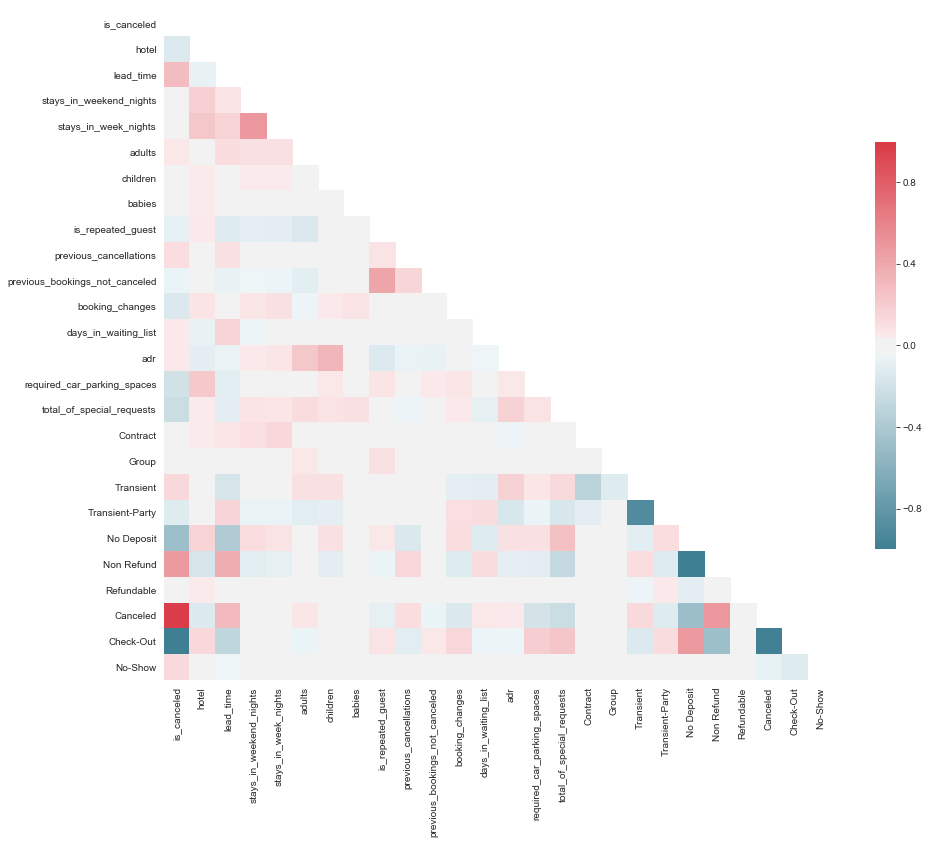

In [21]:
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df_num.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_num.corr(), mask=mask, square=True, cmap=cmap, cbar_kws={"shrink": .5});

The matrix does not indicate strong correlation for most of the features, however there is strong correlation between some. The labels in the 'reservation_status' feature appear to have direct correlation with the target feature and should therefore be removed prior to modelling. This makes sense for future predictions as the reservation status is not known at the time the booking is made.

## Data Preparation & Build Pipeline

In [126]:
from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

In [127]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [175]:
# Define X and y
y = df['is_canceled']
X = df.drop(['is_canceled'], axis=1)

In [176]:

X[['lead_time','days_in_waiting_list']] = X[['lead_time','days_in_waiting_list']].astype(float)

In [177]:
# Partition data by 60% train set, 20% validation set, 20% test set. 
train_set_X, test_X, train_set_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, validate_X, train_y, validate_y = train_test_split(train_set_X, train_set_y, test_size=0.25)

Based on the observations made in the previous sections, the data will be preprocessed as follows:

* The feature <b>'company'</b> will be dropped since 94% of the feature is missing. The feature <b> 'reservation_status' </b> will be dropped due to direct correlation with the target feature. <b> reservation_status_data </b> will be dropped as it provides little information.
* The feature <b>'is_repeated_guest'</b> is already binary. The <b>'hotel'</b> attribute should be encoded into binary format. All other categorical attributes should be one hot encoded.
* <b>'country'</b> contains 177 unique values. Countries that generate less than a specified amount of booking will be grouped together.
* <b>'agent'</b> contains 333 unique values. Agents will discretized into bins based on the amount of bookings they generate.
* Using the 'week_func' function in the previous section, a weekday column will be generated. The features <b>'arrival_date_week_number'</b> and <b>'arrival_date_day_of_month'</b> will be dropped to reduce dimensionality.
* All missing values for numerical features will be assigned 0 as a placeholder, catergorical features will be assigned 'unknown'.

Prior to constructing the transformation pipeline, some custom transformers are needed to handle the following:

* Discretize the 'agent' feature into bins based on the number of bookings they generate.
* Group low count countries in the 'country' feature into one group.
* Create a weekday column based on the date info already given in dataset.

In [131]:
class AgentDiscretizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, bins=1):
        self.bins = bins

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['agent'].fillna('unknown', inplace=True)
        vc = pd.DataFrame(X_copy['agent'].value_counts()).reset_index()
        
        vc['agent_bins'] = pd.cut(vc.iloc[:,1], bins=self.bins, labels=False)
        vc['agent_bins'] = vc['agent_bins'].astype(str)
        
        for i in vc['agent_bins'].unique():
            vc['agent_bins'] = vc['agent_bins'].replace({i: 'agent_bin_'+ i})

        X_copy = X_copy.merge(vc[['index','agent_bins']], left_on='agent', right_on='index', how='left').drop(['agent','index'],axis=1)
        return X_copy

The above transformer takes one hyperparamter, "bins", which is the number of equal-width bins to discretize the 'agent' column subject to their count in the dataset. The transformer will then generate a new feature for the assigned labels of each agent based the bin they fall under. Finally, the 'agent' feature will be dropped from the dataset.

In [132]:
class CountryGrouper(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_count=0):
        self.group_count = group_count
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['country'].fillna('unknown', inplace=True)
        vc = X_copy['country'].value_counts()
        for i in vc[vc <= self.group_count].index.tolist():
            X_copy['country'] = X_copy['country'].replace({i: 'OtherGroup'})
        return X_copy

This next transformer takes one hyperparameter, "group_count", which is the threshold to apply the grouping when a country's count is less than or equal to the threshold. For ex. if group_count = 1, countries that produce only one booking will be grouped together under the label, 'OtherGroup'. Note that it will first convert all missing values to 'unknown'. 

In [133]:
class WeekdayCreator(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['month'] = X_copy['arrival_date_month'].map(month_dict)
        X_copy['weekday'] = X_copy.apply(week_func, axis=1)  # function borrowed from data visualization step 
        X_copy = X_copy.drop(['month', 'arrival_date_week_number', 'arrival_date_day_of_month'],axis=1)
        return X_copy

The last custom transformer utilizes that dataset's 'arrival_date_year', 'arrival_date_month' and 'arrival_date_day_of_month' to generate the day of the week associated with a given record (i.e. Monday, Tuesday, etc.). After which, the 'arrival_date_week_number' and 'arrival_date_day_of_month' features are dropped.

In [179]:
X_cat = ['arrival_date_year', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 
         'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'agent_bins', 
         'weekday']

In [299]:
# Keep in mind that for the binary features (Bernoulli random variables) variance is calculated as: Var(x)=p(1−p)

preprocess_scaled = ColumnTransformer(transformers=[('drop_columns', 'drop', ['company','reservation_status','reservation_status_date']),
                                                    ('scaler', StandardScaler(), ['adr']),
                                                    ('impute_num', SimpleImputer(strategy='constant', fill_value=0), ['children']),
                                                    ('hotel_enc', OrdinalEncoder(), ['hotel']),
                                                    ('cat_enc', OneHotEncoder(handle_unknown='ignore'), X_cat)],
                                      remainder='passthrough',
                                      sparse_threshold=0)

In [300]:
full_preprocess = Pipeline([('weekdays', WeekdayCreator()),
                            ('group_countries', CountryGrouper(group_count=100)), 
                            ('agent_bins', AgentDiscretizer(bins=20)),
                            ('preprocess', preprocess_scaled),
                            ('variance_threshold', VarianceThreshold(threshold=(.05*(1 -.05))))])

In [301]:
train_X_prepared = full_preprocess.fit_transform(train_X)

## Model Selection

In [232]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix

In this section, five "quick and dirty" classifiers will be trained from various categories: linear, naive Bayes, neighbors, and two ensemble methods (one bagging and one boosting). Since almost all features are in binary, the KNN classifier will be using the Hamming distance metric. Similarlily the Naive Bayes algorithm used will be the Bernoulli naive Bayes since it is best suited to handle binary features. The other base estimator is logistic regression, and the ensemble methods are random forest and gradient boosting.

Due to target class imbalance, the accuracy score may not fully represent a model's strength given that a high score can still be obtained if most of the predictions were made for the majority class. A better altnerative may be observing how well the models predicted the minority class, i.e. 1 in 'is_canceled'. Afterall, the purpose of this project is to assist hotels in predicting cancellations. With that said, the f1-score (or the harmonic mean of precision and recall) for the minority class will also be used. To accomplish this, a custom scorer is be created.

In [205]:
# Create custom scroer using the f1-score for '1' in the target variable. 
f1_scorer = make_scorer(f1_score, pos_label=1)

In [215]:
# Specify 10 folds for CV
skfold = StratifiedKFold(n_splits=10, shuffle=True)

In [316]:
# Create list of models to be trained 
estimators = [('KNN', KNeighborsClassifier(n_neighbors=5, metric='hamming')),
              ('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=4000)),
              ('Naive Bayes', BernoulliNB()),
              ('Random Forest', RandomForestClassifier(n_estimators=100)),
              ('Gradient Boosting', GradientBoostingClassifier())]

In [317]:
f1, accuracy, names  = [], [], []
for name, estimator in estimators:
    
    # Using 10-fold CV, obtain f1-scores and accuracy scores
    f1_scores = cross_val_score(estimator, train_X_prepared, train_y, cv=skfold, scoring=f1_scorer)
    accuracy_scores = cross_val_score(estimator, train_X_prepared, train_y, cv=skfold, scoring='accuracy')
    
    # Fill lists with scores for boxplot visualization step
    f1.append(f1_scores)
    accuracy.append(accuracy_scores)
    names.append(name)
    
    print('%s f1-score: %.2f%%, accuracy: %.2f%%' % (name, 100*f1_scores.mean(), 100*accuracy_scores.mean()))

KNN f1-score: 76.22%, accuracy: 82.80%
Logistic Regression f1-score: 74.25%, accuracy: 82.25%
Naive Bayes f1-score: 63.99%, accuracy: 77.29%
Random Forest f1-score: 84.17%, accuracy: 88.60%
Gradient Boosting f1-score: 79.15%, accuracy: 85.46%


Overall accuracy is pretty good for each 'quick and dirty' classifier after the data transformation; the lowest scoring model is the Bernoulli Naive Bayes at 77.29% accuracy, and highest being Random Forest at 88.60% accuracy. 

As previously stated, the f1-score for the minority class would better describe the strenth of each model given the class imbalance of the target feature. Using this measure, the classifiers don't look as great however with the exception on the Naive Bayes model, they all seem to perform quite well given little to no tuning of its parameters. Random Forest is still leading with an f1-score of 84.17%.

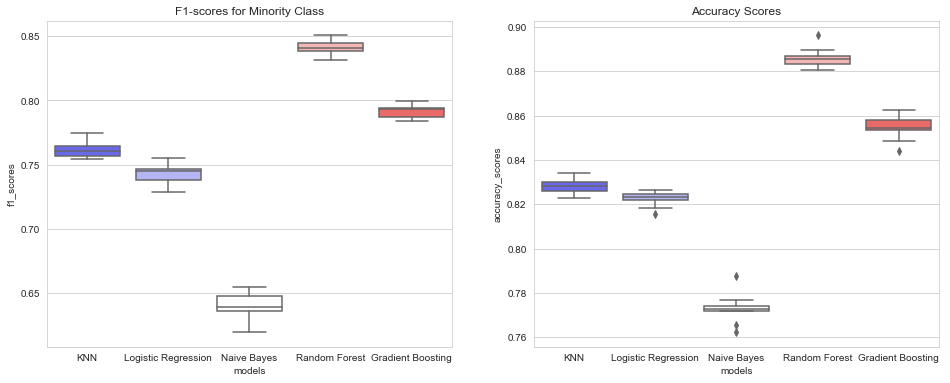

In [393]:
models = [y for x in names for y in (x,)*10]
f1_scores = [item for sublist in f1 for item in sublist]
accuracy_scores = [item for sublist in accuracy for item in sublist]
df_f1 = pd.DataFrame({'models':models, 'f1_scores':f1_scores})
df_accuracy = pd.DataFrame({'models':models, 'accuracy_scores':accuracy_scores})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
sns.boxplot(x='models', y='f1_scores', data=df_f1, palette='bwr', ax=ax1)
ax1.set_title('F1-scores for Minority Class')
sns.boxplot(x='models', y='accuracy_scores', data=df_accuracy, palette='bwr', ax=ax2)
ax2.set_title('Accuracy Scores');

Boxplots are used to visualize each individual score from the 10-fold cross-validation. For both scoring metrics, the distribution for each classifier is small. The KNN and logisitic regression model is observed to have comparable performance, there are instances of logistic regression scoring higher accuracy than KNN. 

Without tuning any hyperparameters, two of the base models are able to achieve 